In [1]:
import pandas as pd, numpy as np
from PIL import Image
from io import BytesIO
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display_png
from IPython.display import SVG as displaySvg
import selfies as sf

## Pictures

In [2]:
def drawMol(mol,legend='',highlightAtoms=[]):
    # d2d = Draw.MolDraw2DCairo(-1,-1)
    d2d = Draw.MolDraw2DSVG(-1,-1)
    dopts = d2d.drawOptions()
    dopts.useBWAtomPalette()
    dopts.continuousHighlight = True
    dopts.circleAtoms = False
    dopts.atomHighlightsAreCircles=False
    dopts.highlightRadius=0.1
    dopts.setHighlightColour((1,0,0,.5))
    # dopts.setBackgroundColour((1,1,1,0))
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    # bio = BytesIO(d2d.GetDrawingText())
    svg = d2d.GetDrawingText()
    return svg.replace('svg:','')
    # return Image.open(bio)

In [3]:
paracetamol = Chem.MolFromSmiles("c1(O)ccc(cc1)NC(C)=O")

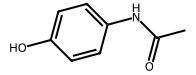

In [4]:
displaySvg(drawMol(paracetamol))

In [4]:
chemicals={"Indomethacin":Chem.CanonSmiles("CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)O"),
     "Serotonin":Chem.CanonSmiles("C1=CC2=C(C=C1O)C(=CN2)CCN"),
     "Sumatriptan":Chem.CanonSmiles("CNS(=O)(=O)CC1=CC2=C(C=C1)NC=C2CCN(C)C"),
          "Paracetamol":"c1(O)ccc(cc1)NC(C)=O"}
df = pd.DataFrame( list(chemicals.values()), columns=["canonSmiles"], index = chemicals.keys() )

In [8]:
df["mol"]=df["canonSmiles"].apply(Chem.MolFromSmiles)

In [7]:
patt=Chem.MolFromSmiles('c1ccc2[nH]ccc2c1')
df["img"]=df["mol"].apply(lambda mol : drawMol( mol, highlightAtoms=mol.GetSubstructMatch(patt)))

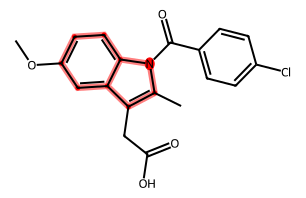

In [8]:
displaySvg(df.iloc[0,-1])

In [11]:
def MolToRestrictedSmiles(mol):
    match = mol.GetSubstructMatch(patt)
    order = set(range(mol.GetNumAtoms()))-set(match)
    np.random.shuffle(list(order))
    random_mol = Chem.RenumberAtoms(mol, newOrder=[*match,*order])
    return Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)

In [12]:
df["restrictSmiles"]=df["mol"].apply(MolToRestrictedSmiles)

NameError: name 'patt' is not defined

In [13]:
df

,canonSmiles,mol
Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fa28ae17300>
Serotonin,NCCc1c[nH]c2ccc(O)cc12,<rdkit.Chem.rdchem.Mol object at 0x7fa28ae17f40>
Sumatriptan,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1,<rdkit.Chem.rdchem.Mol object at 0x7fa28ed38820>
Paracetamol,c1(O)ccc(cc1)NC(C)=O,<rdkit.Chem.rdchem.Mol object at 0x7fa28ed38430>


In [11]:
df.restrictSmiles

Indomethacin    c1(OC)ccc2n(C(=O)c3ccc(Cl)cc3)c(C)c(CC(=O)O)c2c1
Serotonin                               c1(O)ccc2[nH]cc(CCN)c2c1
Sumatriptan              c1(CS(NC)(=O)=O)ccc2[nH]cc(CCN(C)C)c2c1
Paracetamol                                 c1(O)ccc(NC(C)=O)cc1
Name: restrictSmiles, dtype: object

In [42]:
df['selfies']=df['canonSmiles'].apply(sf.encoder)

In [45]:
df['canonSmiles'].tolist()

['COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1',
 'NCCc1c[nH]c2ccc(O)cc12',
 'CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1',
 'c1(O)ccc(cc1)NC(C)=O']

In [44]:
df['selfies'].tolist()

['[C][O][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][C][Branch1][#Branch1][C][C][=Branch1][C][=O][O][=C][Branch1][C][C][N][Ring1][O][C][=Branch1][C][=O][C][=C][C][=C][Branch1][C][Cl][C][=C][Ring1][#Branch1]',
 '[N][C][C][C][=C][NH1][C][=C][C][=C][Branch1][C][O][C][=C][Ring1][#Branch2][Ring1][#Branch1]',
 '[C][N][S][=Branch1][C][=O][=Branch1][C][=O][C][C][=C][C][=C][NH1][C][=C][Branch1][Branch2][C][C][N][Branch1][C][C][C][C][Ring1][#Branch2][=C][Ring1][=C]',
 '[C][Branch1][C][O][=C][C][=C][Branch1][Branch1][C][=C][Ring1][#Branch1][N][C][Branch1][C][C][=O]']

## GoF

In [17]:
from chemicalgof import Smiles2GoF, GoF2Tokens, CanonicalGoF2Tokens, GoF2MoreTokens
from src.processer import augSmiles

In [13]:
for s in chemicals.values():
    G=Smiles2GoF(s)
    T=GoF2Tokens(G)
    print(T.getString())

Cl.<3>c1ccccc1<0>.C=O.<4>c1ccc2[nH]ccc2c1<6>.<0>(O.C.)<5>(C.).C.C=O.O.
N.C.C.<6>c1ccc2[nH]ccc2c1<0>.O.
C.N.(C.).C.C.<6>c1ccc2[nH]ccc2c1<0>.C.O=[SH2]=O.N.C.
C.C=O.N.<0>c1ccccc1<3>.O.


In [29]:
def drawMolPNG(mol,legend='',highlightAtoms=[]):
    # d2d = Draw.MolDraw2DCairo(-1,-1)
    d2d = Draw.MolDraw2DSVG(-1,-1)
    dopts = d2d.drawOptions()
    dopts.useBWAtomPalette()
    dopts.continuousHighlight = True
    dopts.circleAtoms = False
    dopts.atomHighlightsAreCircles=False
    dopts.highlightRadius=0.1
    dopts.setHighlightColour((1,0,0,.5))
    dopts.setBackgroundColour((1,1,1,0))
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    # bio = BytesIO(d2d.GetDrawingText())
    svg = d2d.GetDrawingText()
    return svg.replace('svg:','')
    # return Image.open(bio)

In [15]:
benzene = drawMolPNG(Chem.MolFromSmiles("c1ccccc1"))

In [16]:
carbonile = drawMolPNG(Chem.MolFromSmiles("C=O"))

In [11]:
with open(f'carbonile.svg', 'w') as f:
    f.write(carbonile)

In [12]:
displaySvg(carbonile)

## Chiral fragments

In [4]:
chiral1='C[C@@](O)(Cl)C(=O)NC[C@@H]1CC[C@H](C(=O)O)O1'

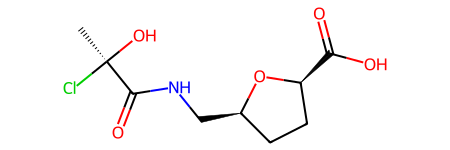

In [5]:
Chem.MolFromSmiles(chiral1)

In [8]:
G=Smiles2GoF(chiral1)
Ts=GoF2MoreTokens(G)

In [9]:
for T in Ts:
    print(*T.getSequence())

C C|R ( O ) ( Cl ) C=O N C <4S> C1CCOC1 <2R> C=O O
C C|R ( Cl ) ( O ) C=O N C <4S> C1CCOC1 <2R> C=O O
O C=O <2R> C1CCOC1 <4S> C N C=O C|R ( C ) ( Cl ) O
O C=O <2R> C1CCOC1 <4S> C N C=O C|R ( Cl ) ( C ) O
Cl C|R ( C ) ( O ) C=O N C <4S> C1CCOC1 <2R> C=O O


In [31]:
augmented_smiles = augSmiles(chiral1)

In [32]:
for augmented in augmented_smiles:
    print(augmented)

C[C@@](O)(Cl)C(=O)NC[C@@H]1CC[C@H](C(=O)O)O1
C1C[C@H](O[C@H]1C(=O)O)CNC(=O)[C@@](Cl)(O)C
C([C@H]1O[C@H](CC1)C(=O)O)NC(=O)[C@@](C)(Cl)O
OC([C@H]1CC[C@@H](CNC([C@@](Cl)(O)C)=O)O1)=O
[C@H]1(C(=O)O)CC[C@@H](CNC(=O)[C@](Cl)(C)O)O1


In [33]:
for augmented in augmented_smiles:
    print(sf.encoder(augmented))

[C][C@@][Branch1][C][O][Branch1][C][Cl][C][=Branch1][C][=O][N][C][C@@H1][C][C][C@H1][Branch1][=Branch1][C][=Branch1][C][=O][O][O][Ring1][Branch2]
[C][C][C@H1][Branch1][#Branch2][O][C@H1][Ring1][Branch1][C][=Branch1][C][=O][O][C][N][C][=Branch1][C][=O][C@@][Branch1][C][Cl][Branch1][C][O][C]
[C][Branch1][#C][C@H1][O][C@H1][Branch1][Branch1][C][C][Ring1][Branch1][C][=Branch1][C][=O][O][N][C][=Branch1][C][=O][C@@][Branch1][C][C][Branch1][C][Cl][O]
[O][C][Branch2][Ring1][Branch2][C@H1][C][C][C@@H1][Branch1][#C][C][N][C][Branch1][=Branch2][C@@][Branch1][C][Cl][Branch1][C][O][C][=O][O][Ring1][=N][=O]
[C@H1][Branch1][=Branch1][C][=Branch1][C][=O][O][C][C][C@@H1][Branch1][#C][C][N][C][=Branch1][C][=O][C@][Branch1][C][Cl][Branch1][C][C][O][O][Ring1][S]


In [10]:
chiral2='ClCC2C[C@H]1C(Cl)N[C@@H]1CN2'

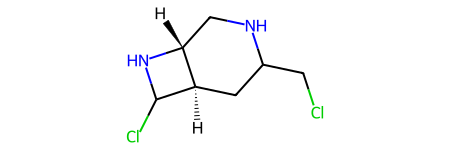

In [11]:
Chem.MolFromSmiles(chiral2)

In [12]:
G=Smiles2GoF(chiral2)
Ts=GoF2MoreTokens(G)

In [13]:
for T in Ts:
    print(*T.getSequence())

Cl C <0> C1CC2CNC2CN1|2R5S <3> Cl
Cl <3> C1CC2CNC2CN1|2R5S <0> C Cl


In [14]:
augmented_smiles = augSmiles(chiral1)

In [15]:
for augmented in augmented_smiles:
    print(augmented)

C[C@@](O)(Cl)C(=O)NC[C@@H]1CC[C@H](C(=O)O)O1
N(C([C@@](O)(C)Cl)=O)C[C@@H]1CC[C@@H](O1)C(=O)O
[C@](C(=O)NC[C@@H]1CC[C@@H](O1)C(=O)O)(Cl)(C)O
C1[C@@H](CNC(=O)[C@@](Cl)(O)C)O[C@H](C1)C(=O)O
[C@H]1(CC[C@H](C(O)=O)O1)CNC(=O)[C@](Cl)(C)O


In [50]:
sf.encoder(chiral2)

'[Cl][C][C][C][C@H1][C][Branch1][C][Cl][N][C@@H1][Ring1][Branch1][C][N][Ring1][=Branch2]'

## SMILES wrong chirality

In [13]:
gen_chiral_smi = 'COc2ccc1[nH]c(C)c(CC(=O)O)c1c2'

In [20]:
Gchiral = Smiles2GoF(gen_chiral_smi)
T = CanonicalGoF2Tokens(Gchiral)
print(*T.getSequence())

C O <0> c1ccc2[nH]ccc2c1 <6> <5> ( C ) C C=O O


In [14]:
res_chiral_mol = Chem.MolFromSmiles(gen_chiral_smi)

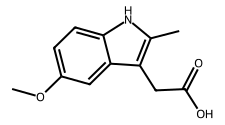

In [16]:
displaySvg(drawMol(res_chiral_mol))

In [18]:
with open(f'figures/gen_chiral_mol.svg', 'w') as f:
    f.write(drawMolPNG(res_chiral_mol))

## Different fragmentation rules

In [16]:
chemicals['Indomethacin']

'COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1'

In [30]:
with open(f'figures/indomethacin_raw.svg', 'w') as f:
    f.write(drawMolPNG(Chem.MolFromSmiles(chemicals['Indomethacin'])))

In [26]:
indo_raw_svg = displaySvg(drawMol(Chem.MolFromSmiles(chemicals['Indomethacin'])))

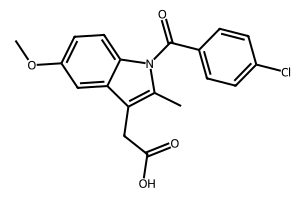

In [27]:
indo_raw_svg

In [18]:
smartsRotatable="[!$(*#*)&!D1]-!@[!$(*#*)&!D1]"

In [21]:
indo_defaultG = Smiles2GoF(chemicals['Indomethacin'])
indo_defaultT = CanonicalGoF2Tokens(indo_defaultG)

indo_rotatableG = Smiles2GoF(chemicals['Indomethacin'], pattBonds=smartsRotatable)
indo_rotatableT = CanonicalGoF2Tokens(indo_rotatableG)

In [23]:
' '.join(indo_defaultT.getSequence())

'O C=O C <6> c1ccc2[nH]ccc2c1 <4> <0> ( O C ) <5> ( C ) C=O <0> c1ccccc1 <3> Cl'

In [24]:
' '.join(indo_rotatableT.getSequence())

'O=CO <1> C <2> Cc1cc2ccccc2[nH]1 <9> <5> ( <1> CO ) C=O <4> Clc1ccccc1'